In [1]:
%matplotlib inline
import sys
sys.path.append('..')

# Un vistazo a los datos
Vamos a cargar el vector de características.

In [2]:
from dns_attacks_detection import *

In [3]:
try:
    dns = joblib.load('../vectors/LettersAndNumbersFV.pkl')
except FileNotFoundError:
    dns = create_feature_vector_from_log_file('../logs/3JUL.log', extract_features_with_letters_and_numbers)
    joblib.dump(dns, '../vectors/LettersAndNumbersFV.pkl')

In [4]:
dns.head()

,attack,letters,longest_number,numbers,symbols
0,0,1.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0
2,0,1.0,0.0,0.0,0.0
3,0,1.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0


In [5]:
dns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 5 columns):
attack            52610 non-null int64
letters           52610 non-null float64
longest_number    52610 non-null float64
numbers           52610 non-null float64
symbols           52610 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.0 MB


In [6]:
dns.describe()

,attack,letters,longest_number,numbers,symbols
count,52610.000000,52610.000000,52610.000000,52610.000000,52610.000000
mean,0.050960,0.887117,0.102316,0.111230,0.001654
std,0.219918,0.277083,0.266150,0.277009,0.013217
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.250000


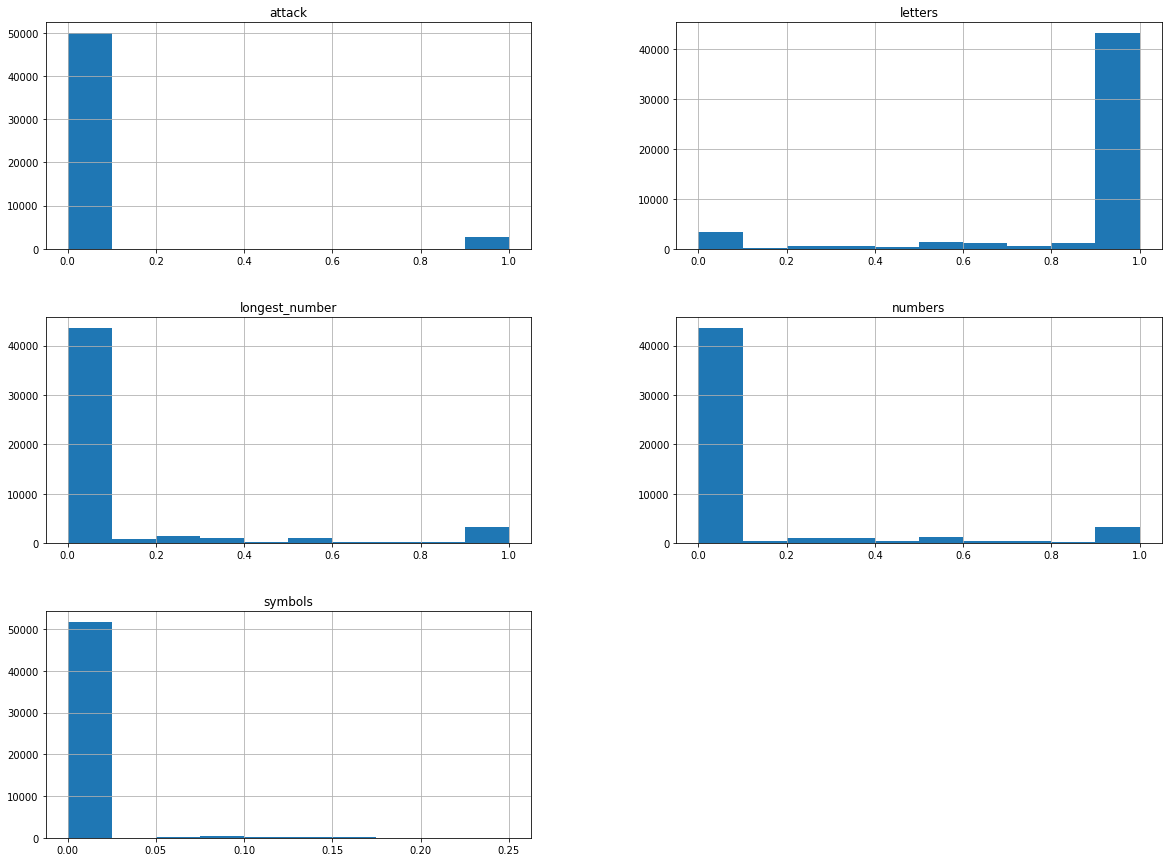

In [7]:
dns.hist(figsize=(20,15))
plt.show()

# Creación de un "test set"
Creación usando "stratified sampling" dependiendo si una consulta es un ataque o no.

In [8]:
train_set, test_set = split_train_and_test_sets(dns, 'attack')

In [9]:
train_set['attack'].value_counts() / len(train_set)

0    0.949035
1    0.050965
Name: attack, dtype: float64

In [10]:
test_set['attack'].value_counts() / len(test_set)

0    0.949059
1    0.050941
Name: attack, dtype: float64

El conjunto de entrenamiento y el conjunto de test tienen proporciones similares.

# Descubrir y visualizar los datos

In [11]:
train_set_copy = train_set.copy()

Buscando correlaciones: comprobemos si algún atributo se correlaciona con el atributo de ataque.

In [12]:
corr_matrix = train_set_copy.corr()
corr_matrix['attack'].sort_values(ascending=False)

attack            1.000000
numbers           0.355623
longest_number    0.241213
symbols          -0.029131
letters          -0.354139
Name: attack, dtype: float64

Los números y la ausencia de letras parecen tener algo de relación con los ataques.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd372fb6828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd376a5fb00>]], dtype=object)

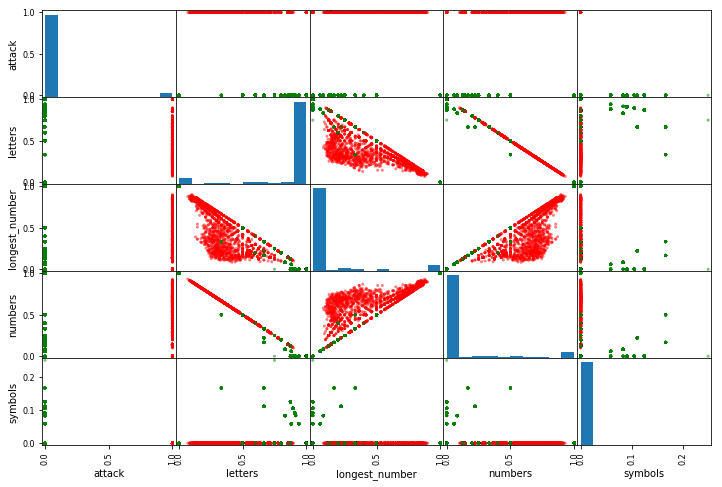

In [13]:
attributes = train_set_copy.columns
col_map = {0:'green', 1:'red'}
colours = list(map(lambda x:col_map.get(x), train_set_copy['attack']))
scatter_matrix(train_set_copy[attributes], figsize=(12, 8), c=colours)

# Selección y entrenamiento de modelos

En este apartado vamos a entrenar distintos tipos de modelos y haremos una selección de los que mejor rendimiento tengan.

In [14]:
features = train_set.drop('attack', 1)
features

,letters,longest_number,numbers,symbols
19038,1.000000,0.000000,0.000000,0.0
34347,1.000000,0.000000,0.000000,0.0
38293,1.000000,0.000000,0.000000,0.0
15027,1.000000,0.000000,0.000000,0.0
32646,1.000000,0.000000,0.000000,0.0
18206,0.315789,0.210526,0.684211,0.0
40710,1.000000,0.000000,0.000000,0.0
47415,1.000000,0.000000,0.000000,0.0
21099,1.000000,0.000000,0.000000,0.0
10444,1.000000,0.000000,0.000000,0.0


In [15]:
labels = train_set['attack']
labels

19038    0
34347    0
38293    0
15027    0
32646    0
18206    1
40710    0
47415    0
21099    0
10444    0
20086    0
46941    0
22703    1
27980    0
29957    0
21281    0
37689    0
35961    0
7664     1
23435    0
37630    0
35801    0
6023     0
7777     0
33452    0
20629    0
46080    0
3813     0
19759    0
2792     0
        ..
19146    0
45370    0
2599     0
9440     0
20665    0
40669    0
17967    0
21537    0
40308    0
41310    0
39340    0
26520    0
10041    0
3399     0
20828    0
21972    0
25180    0
26146    0
14883    0
32959    0
38584    0
14303    0
4482     0
19699    0
29817    0
38981    0
1251     0
29917    0
46138    0
18349    0
Name: attack, Length: 42088, dtype: int64

## Stochastic Gradient Descent (SGD) classifier

In [16]:
sgd_clf = SGDClassifier(max_iter=5, random_state=13)
sgd_clf.fit(features, labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=13, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
some_data = features[:10]
some_labels = labels[:10]
print("Predictions:", sgd_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.
"cross_val_predict" realiza "K-fold cross-validation" devolviendo las predicciones realizadas en cada "test fold".

In [18]:
train_predicted_labels = cross_val_predict(sgd_clf, features, labels, cv=5)

In [19]:
confusion_matrix(labels, train_predicted_labels)

array([[39753,   190],
       [ 1229,   916]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [20]:
precision_score(labels, train_predicted_labels)

0.82820976491862563

In [21]:
recall_score(labels, train_predicted_labels)

0.42703962703962706

In [22]:
f1_score(labels, train_predicted_labels)

0.56351891725622882

### Análisis

Obtengamos la puntuación que el clasificador SGD da a todas las predicciones.

In [23]:
labels_scores = cross_val_predict(sgd_clf, features, labels, cv=5, method='decision_function')

In [24]:
labels_scores

array([-1.19524053, -1.19524053, -1.19524053, ..., -1.35862627,
       -1.35862627, -1.35862627])

Las puntuaciones viven entre los valores -1.35 y 4.29:

In [25]:
labels_scores.min()

-1.3586262701957268

In [26]:
labels_scores.max()

4.2938296391149144

Tracemos la curva de precisión vs. exhaustividad.

In [27]:
precisions, recalls, thresholds = precision_recall_curve(labels, labels_scores)

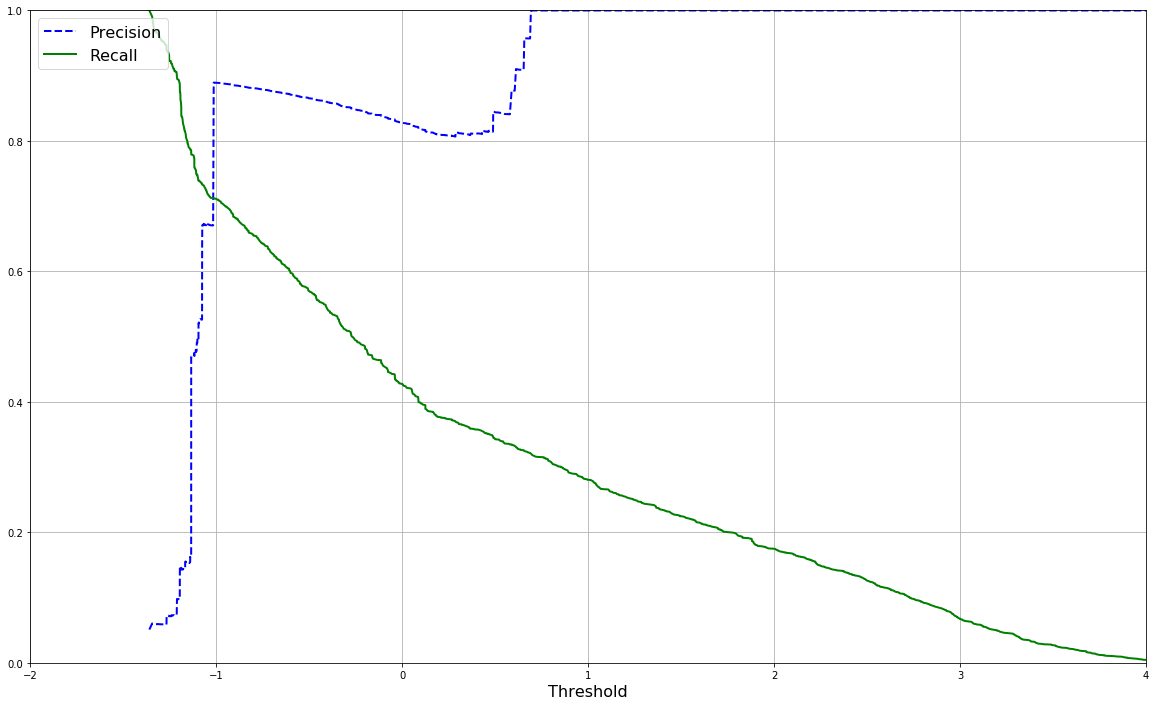

In [28]:
plt.figure(figsize=(20, 12))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-2, 4])
plt.show()

Con un valor cercano a -1 de umbral parece dar un resultado aceptable de precisión/exhaustividad:

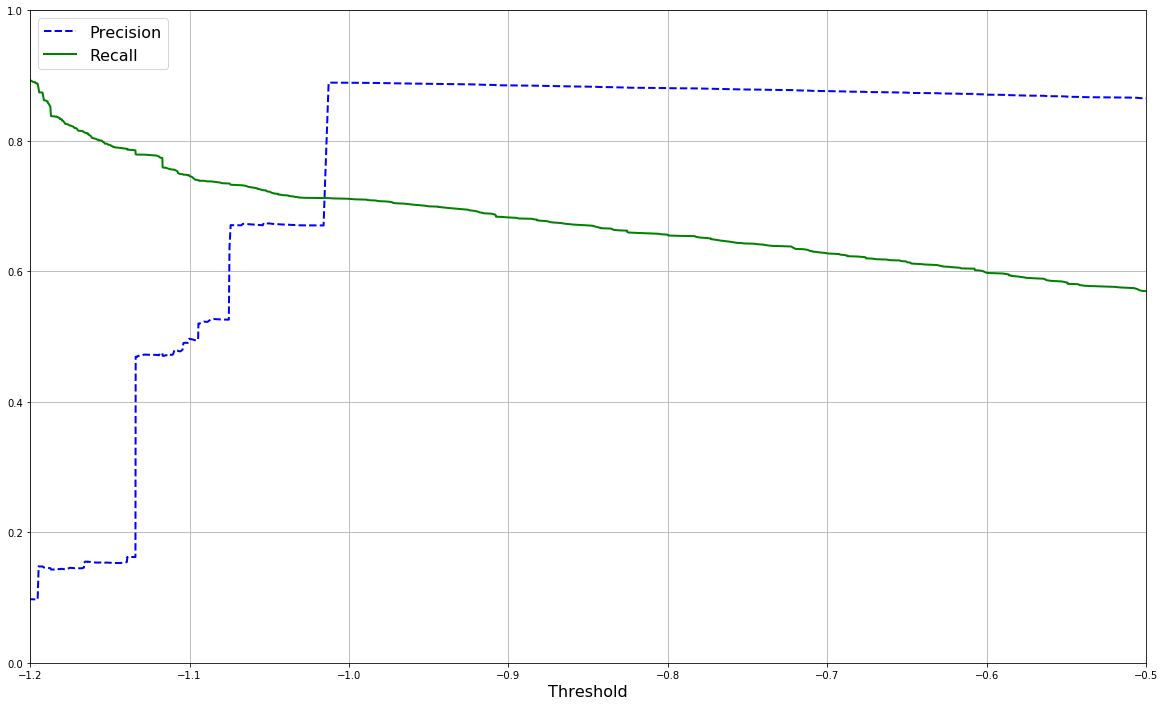

In [29]:
plt.figure(figsize=(20, 12))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-1.2, -0.5])
plt.show()

Comprobamos los valores de precisión y exhaustividad ajustando el umbral a -1:

In [30]:
labels_train_pred_89 = (labels_scores > -1)

In [31]:
confusion_matrix(labels, labels_train_pred_89)

array([[39753,   190],
       [  621,  1524]])

In [32]:
precision_score(labels, labels_train_pred_89)

0.88914819136522749

In [33]:
recall_score(labels, labels_train_pred_89)

0.71048951048951048

In [34]:
f1_score(labels, labels_train_pred_89)

0.78984192796061148

## Logistic Regression classifier

In [35]:
log_reg_clf = LogisticRegression(random_state=13, solver='liblinear')
log_reg_clf.fit(features, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=13, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
print("Predictions:", log_reg_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [37]:
train_predicted_labels = cross_val_predict(log_reg_clf, features, labels, cv=5)

In [38]:
confusion_matrix(labels, train_predicted_labels)

array([[39753,   190],
       [ 1321,   824]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [39]:
precision_score(labels, train_predicted_labels)

0.81262327416173574

In [40]:
recall_score(labels, train_predicted_labels)

0.38414918414918414

In [41]:
f1_score(labels, train_predicted_labels)

0.52168407723963284

### Análisis

Para poder representar gráficamente como actúa el modelo, dejemos sólo las dos características relacionadas con los números.

In [42]:
reduced_features = features.drop(['letters', 'symbols'], 1)
train_predicted_labels = cross_val_predict(log_reg_clf, reduced_features, labels, cv=5)

In [43]:
confusion_matrix(labels, train_predicted_labels)

array([[39773,   170],
       [ 1342,   803]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [44]:
precision_score(labels, train_predicted_labels)

0.82528263103802668

In [45]:
recall_score(labels, train_predicted_labels)

0.37435897435897436

In [46]:
f1_score(labels, train_predicted_labels)

0.5150737652341244

Al deshacernos de las dos características anteriories, la precisión y exhaustividad se mantienen muy similares.
Generamos datos para ver cómo evolucionan las estimaciones con distintos datos.

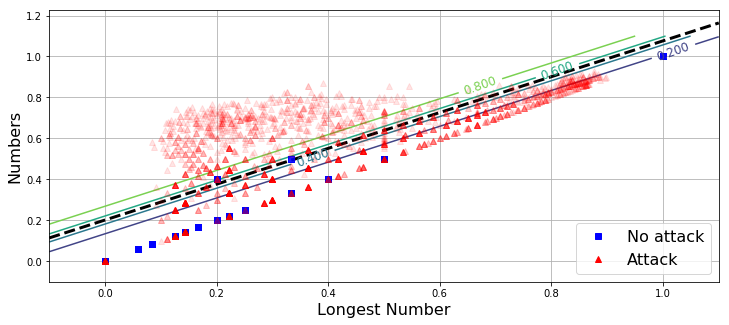

In [47]:
log_reg_clf.fit(reduced_features, labels)

plt.figure(figsize=(12, 5))

plot_predictions_for_logistic_regression(log_reg_clf, [-0.1, 1.1, -0.1, 1.1])

X = reduced_features.values
y = labels.values

plot_dataset(X, y, "Longest Number", "Numbers")

plt.show()

Con esta representación se puede ver claramente que no hay ninguna frontera de decisión debido a la distribución de las características. Por lo tanto, un modelo de "Logistic Regression" no tendrá un buen rendimiento, debido a que no es capaz de diferenciar claramente los ataques de los que no lo son. La línea de puntos marca la frontera de decisión que usa el modelo para decidir si una consulta es un ataque o no. Las líneas de colores marcan las probabilidades que tiene una instancia de pertenecer a la clase "Attack".

La precisión es mucho más alta que la exahustividad, debido a que en un lado de la frontera, la mayoría de ejemplos son ataques, por lo tanto el modelo clasifica correctamente estos ataques. Sin embargo, en el otro lado de la frontera hay tanto ataques como no ataques, por lo que estos ataques son clasificados erróneamente como no ataques (falsos negativos).

## Support Vector Machines

* ## Con Polynomial Kernel

In [48]:
svm_clf_poly = SVC(kernel='poly', random_state=13, gamma='auto', degree=3, coef0=1, C=5)
svm_clf_poly.fit(features, labels)

SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
print("Predictions:", svm_clf_poly.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [50]:
train_predicted_labels = cross_val_predict(svm_clf_poly, features, labels, cv=5)

In [51]:
confusion_matrix(labels, train_predicted_labels)

array([[39759,   184],
       [  640,  1505]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [52]:
precision_score(labels, train_predicted_labels)

0.89105979869745411

In [53]:
recall_score(labels, train_predicted_labels)

0.70163170163170163

In [54]:
f1_score(labels, train_predicted_labels)

0.78508085550339068

### Análisis

Para poder representar gráficamente cómo actúa el modelo, volvamos a usar el vector que tiene sólo las dos características relacionadas con los números.

In [55]:
train_predicted_labels = cross_val_predict(svm_clf_poly, reduced_features, labels, cv=5)

In [56]:
confusion_matrix(labels, train_predicted_labels)

array([[39753,   190],
       [  627,  1518]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [57]:
precision_score(labels, train_predicted_labels)

0.88875878220140514

In [58]:
recall_score(labels, train_predicted_labels)

0.70769230769230773

In [59]:
f1_score(labels, train_predicted_labels)

0.78795743576433952

De nuevo la precisión y exhaustividad se mantienen muy similares después de eliminar las características "letters" y "symbols".

Probemos a representar gráficamente nuestro modelo y otro modelo con mayor grado para la función polinómica del kernel y mayor parámetro de penalización (C).

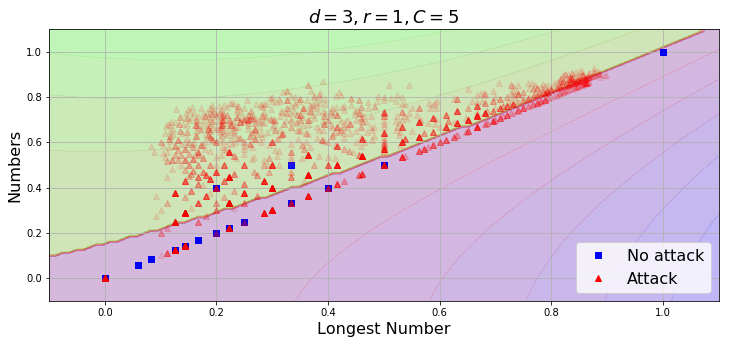

In [60]:
svm_clf_poly.fit(reduced_features, labels)

plt.figure(figsize=(12, 5))

plot_predictions_for_SVC(svm_clf_poly, [-0.1, 1.1, -0.1, 1.1]) 

plot_dataset(X, y, "Longest Number", "Numbers")

plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.show()

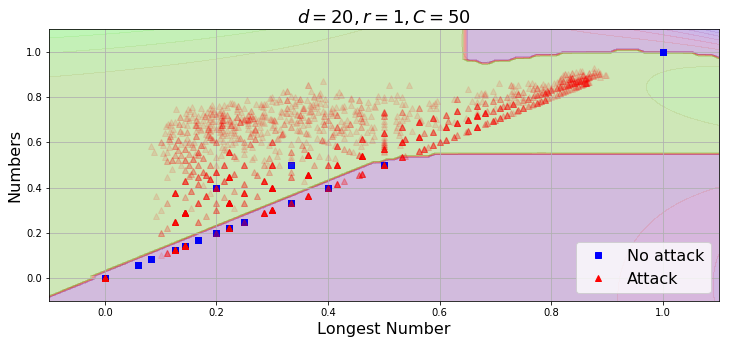

In [61]:
svm_clf_poly = SVC(kernel='poly', random_state=13, gamma='auto', degree=20, coef0=1, C=50)
svm_clf_poly.fit(reduced_features, labels)

plt.figure(figsize=(12, 5))

plot_predictions_for_SVC(svm_clf_poly, [-0.1, 1.1, -0.1, 1.1])

plot_dataset(X, y, "Longest Number", "Numbers")

plt.title(r"$d=20, r=1, C=50$", fontsize=18)

plt.show()

Se puede ver que aumentando el grado de la función polinómica del kernel y la penalización por error, el modelo se ajusta algo mejor a los datos. Aún así, sigue existiendo un área compartida entre los ataques y los no ataques, en la que parece difícil realizar una diferenciación. Por lo tanto, el modelo es capaz de identificar un gran número de ataques pero sigue sin clasificar correctamente los ataques que tienen características similares a los no ataques.

* ## Con Gaussian RBF Kernel

In [153]:
svm_clf_rbf = SVC(kernel='rbf', random_state=13, gamma=5, C=5)
svm_clf_rbf.fit(features, labels)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
print("Predictions:", svm_clf_rbf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [64]:
train_predicted_labels = cross_val_predict(svm_clf_rbf, features, labels, cv=5)

In [65]:
confusion_matrix(labels, train_predicted_labels)

array([[39773,   170],
       [  435,  1710]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [66]:
precision_score(labels, train_predicted_labels)

0.90957446808510634

In [67]:
recall_score(labels, train_predicted_labels)

0.79720279720279719

In [68]:
f1_score(labels, train_predicted_labels)

0.84968944099378885

El modelo "Gaussian RBF Kernel" da un rendimiento superior que los modelos antes analizados. Es uno de los modelos prometedores que serán afinados en la siguiente fase.

### Análisis

Usemos de nuevo el vector con las características reducidas para la representación gráfica.

In [69]:
train_predicted_labels = cross_val_predict(svm_clf_rbf, reduced_features, labels, cv=5)

In [70]:
confusion_matrix(labels, train_predicted_labels)

array([[39753,   190],
       [  444,  1701]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [71]:
precision_score(labels, train_predicted_labels)

0.89952406134320462

In [72]:
recall_score(labels, train_predicted_labels)

0.79300699300699296

In [73]:
f1_score(labels, train_predicted_labels)

0.84291377601585726

La precisión y exhaustividad se siguen manteniendo similares.

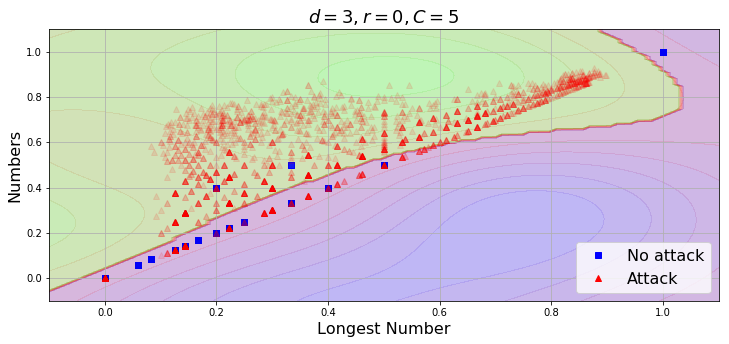

In [154]:
svm_clf_rbf.fit(reduced_features, labels)
plt.figure(figsize=(12, 5))

plot_predictions_for_SVC(svm_clf_rbf, [-0.1, 1.1, -0.1, 1.1])

plot_dataset(X, y, "Longest Number", "Numbers")

plt.title(r"$d=3, r=0, C=5$", fontsize=18)

plt.show()

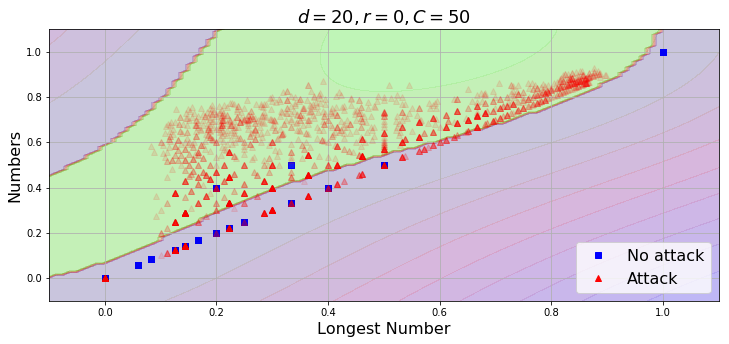

In [155]:
svm_clf_rbf = SVC(kernel='rbf', random_state=13, gamma='auto', degree=20, C=50)
svm_clf_rbf.fit(reduced_features, labels)

plt.figure(figsize=(12, 5))

plot_predictions_for_SVC(svm_clf_rbf, [-0.1, 1.1, -0.1, 1.1])

plot_dataset(X, y, "Longest Number", "Numbers")

plt.title(r"$d=20, r=0, C=50$", fontsize=18)

plt.show()

Bastante similar a los modelos anteriores, sigue existiendo un área donde el modelo no puede distinguir los ataques de los no ataques.

## Decision Trees

In [75]:
tree_clf = DecisionTreeClassifier(random_state=13)
tree_clf.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

In [76]:
print("Predictions:", tree_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [77]:
train_predicted_labels = cross_val_predict(tree_clf, features, labels, cv=5)

In [78]:
confusion_matrix(labels, train_predicted_labels)

array([[39900,    43],
       [  173,  1972]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [79]:
precision_score(labels, train_predicted_labels)

0.97866004962779152

In [80]:
recall_score(labels, train_predicted_labels)

0.91934731934731939

In [81]:
f1_score(labels, train_predicted_labels)

0.94807692307692315

### Análisis

In [82]:
export_graphviz(
        tree_clf,
        out_file='../images/tree_clf_dns.dot',
        feature_names=features.columns,
        class_names=['No attack', 'Attack'],
        rounded=True,
        filled=True
    )

![tree_clf_dns.png](../images/tree_clf_dns.png "Árbol de decisión")

El modelo "Decision Tree" parece dar un rendimiento bastante alto. Sin embargo, al no haber añadido ningún parámetro para restringir la estructura del modelo, es posible que este modelo esté algo sobreajustado, como veremos más adelante. Es otro de los modelos que será afinado en la siguiente fase.

Como podemos ver en la imagen, al no añadir ningún parámetro, la estructura del árbol crece libremente. De esta manera, el modelo se ajustará de una forma bastante cercana a los datos, pudiendo crear un sobreajuste.

## K-Nearest-Neighbors

In [83]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [84]:
print("Predictions:", knn_clf.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0 0 0 0 0 1 0 0 0 0]
Labels: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [85]:
train_predicted_labels = cross_val_predict(knn_clf, features, labels, cv=5)

In [86]:
confusion_matrix(labels, train_predicted_labels)

array([[39900,    43],
       [  172,  1973]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [87]:
precision_score(labels, train_predicted_labels)

0.97867063492063489

In [88]:
recall_score(labels, train_predicted_labels)

0.91981351981351978

In [89]:
f1_score(labels, train_predicted_labels)

0.94832972843066565

El modelo KNN también tiene un rendimiento bastante alto, por lo que será afinado en la siguiente fase.

### Análisis

Hagamos una representación gráfica usando el vector con características reducidas.

In [90]:
train_predicted_labels = cross_val_predict(knn_clf, reduced_features, labels, cv=5)

In [91]:
confusion_matrix(labels, train_predicted_labels)

array([[39873,    70],
       [  209,  1936]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [92]:
precision_score(labels, train_predicted_labels)

0.96510468594217347

In [93]:
recall_score(labels, train_predicted_labels)

0.90256410256410258

In [94]:
f1_score(labels, train_predicted_labels)

0.93278728017345225

Mantenemos valores similares de precisión y exhaustividad.

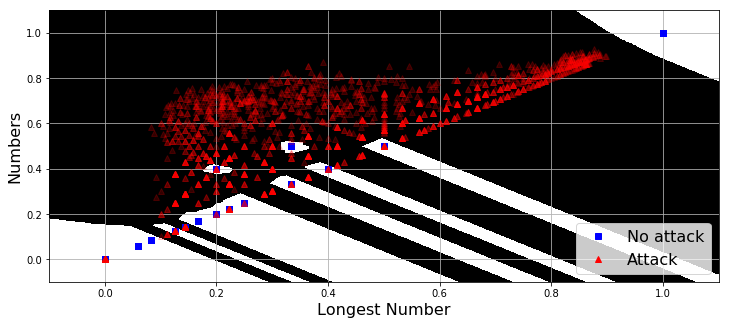

In [95]:
knn_clf_red = KNeighborsClassifier()
knn_clf_red.fit(reduced_features, labels)

plt.figure(figsize=(12, 5))

plot_predictions_for_KNN(knn_clf_red, [-0.1, 1.1, -0.1, 1.1])

plot_dataset(X, y, "Longest Number", "Numbers", 0.2)

plt.show()

En blanco se pueden ver las áreas de influencia de los no ataques, mientras que la zona negra es la zona de influencia de los ataques. Aunque comete algunos fallos, es más flexible que los modelos anteriores.

# Afinación de Modelos

Los tres últimos modelos parecen dar un mejor resultado que los otros, por lo tanto, el objetivo es modificar sus hiperparámetros para encontrar los mejores valores posibles para predecir los ataques. Más tarde, estos modelos pueden ser utilizados individualmente o combinando varios ("Ensemble Methods").
Se utilizarán los métodos de "Randomized Search" y "Grid Search" para explorar las distintas combinaciones de hiperparámetros.
Para la puntuación, nos centraremos en el valor de exhaustividad ("recall") ya que nuestro objetivo es el de poder clasificar el mayor número de ataques posibles.

## Support Vector Machines (Gaussian RBF Kernel)

### Randomized Search

In [96]:
svm_clf_rbf = SVC(kernel='rbf', random_state=13)
param_distribs = {
        'gamma': randint(low=1, high=100),
        'C': randint(low=1, high=500),
    }
svm_clf_rbf_rnd_search = RandomizedSearchCV(svm_clf_rbf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='recall', random_state=13, return_train_score=False)
svm_clf_rbf_rnd_search.fit(features, labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=13,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd372d89b38>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd372d89160>},
          pre_dispatch='2*n_jobs', random_state=13, refit=True,
          return_train_score=False, scoring='recall', verbose=0)

In [97]:
search_results = svm_clf_rbf_rnd_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.897902341592 {'C': 339, 'gamma': 49}
0.89277411431 {'C': 75, 'gamma': 17}
0.918415306103 {'C': 231, 'gamma': 99}
0.895571394645 {'C': 245, 'gamma': 26}
0.903963014113 {'C': 237, 'gamma': 59}
0.895571394645 {'C': 484, 'gamma': 27}
0.915151747764 {'C': 245, 'gamma': 67}
0.903963014113 {'C': 431, 'gamma': 55}
0.916084193004 {'C': 230, 'gamma': 78}
0.907692573536 {'C': 75, 'gamma': 74}


Tenemos varios resultados con una exhaustividad alrededor de 0.91. A partir de estos datos, al realizar el "Grid Search" nos centraremos en los valores de "C" y "gamma" más bajos, para evitar el sobreajuste ("overfitting").
Al usar el modelo anteriormente con los valores C=5 y gamma=5, obtuvimos una exahustividad de 0.79.
En esta ocasión, con unos valores de C=75 y gamma=74, obtenemos una exhaustivdad de 0.91. Por lo tanto, se retocarán estos valores por si se puede encontrar un resultado mejor.

### Grid Search

In [98]:
param_grid = {'C': [10, 20, 30, 50], 'gamma': [1, 10, 20, 50]}
svm_clf_rbf_grid_search = GridSearchCV(svm_clf_rbf, param_grid, cv=5, scoring='recall', return_train_score=False)
svm_clf_rbf_grid_search.fit(features, labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=13,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [10, 20, 30, 50], 'gamma': [1, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='recall', verbose=0)

In [99]:
search_results = svm_clf_rbf_grid_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.781818281509 {'C': 10, 'gamma': 1}
0.765036094869 {'C': 10, 'gamma': 10}
0.784616004916 {'C': 10, 'gamma': 20}
0.893706448782 {'C': 10, 'gamma': 50}
0.789277677274 {'C': 20, 'gamma': 1}
0.772960882493 {'C': 20, 'gamma': 10}
0.866201197269 {'C': 20, 'gamma': 20}
0.896037561881 {'C': 20, 'gamma': 50}
0.789277677274 {'C': 30, 'gamma': 1}
0.772960882493 {'C': 30, 'gamma': 10}
0.889044499504 {'C': 30, 'gamma': 20}
0.896037561881 {'C': 30, 'gamma': 50}
0.790676234366 {'C': 50, 'gamma': 1}
0.77995394487 {'C': 50, 'gamma': 10}
0.89277411431 {'C': 50, 'gamma': 20}
0.896037561881 {'C': 50, 'gamma': 50}


Los valores de C=10 y gamma=50 parecen dar un resultado aceptable de exhaustividad con 0.89. Es preferible escoger estos valores más bajos, comprobaremos más adelante si son lo suficiente bajos para que no sobreajusten el modelo.

## Decision Trees

### Randomized Search

In [100]:
param_distribs = {
        'max_depth': randint(low=5, high=10),
        'min_samples_split': randint(low=12, high=25),
        'min_samples_leaf': randint(low=3, high=8)
    }
tree_clf_rnd_search = RandomizedSearchCV(tree_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='recall', random_state=13, return_train_score=False)
tree_clf_rnd_search.fit(features, labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd372e74160>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd372e6be80>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd372d80e10>},
          pre_dispatch='2*n_jobs', random_state=13, refit=True,
          return_train_score=False, scoring='recall', verbose=0)

In [101]:
search_results = tree_clf_rnd_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.906294071828 {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 22}
0.720746385972 {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 16}
0.862937528163 {'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 22}
0.910489798486 {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 16}
0.904429181349 {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 21}
0.906293794908 {'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 14}
0.720746385972 {'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 17}
0.909557353247 {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 18}
0.910489798486 {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 14}
0.720746385972 {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 23}


Al añadir estos parámetros al árbol de decisión nos encontramos con valores más bajos de exahustividad que cuando el modelo no tenía parámetros. Es muy probable que el modelo sin parámetros estuviera sobreajustado, debido al propio funcionamiento del modelo. Si un árbol de decisión se deja sin restricciones, éste tenderá a ajustarse a los datos, adaptándose a ellos de forma muy cercana. Por lo tanto, hay muchas posibilidades de que un árbol de decisión sin restricciones estará sobreajustado.
Debido a esto, añadiremos algunos parámetros a nuestro árbol para que pueda generalizar más con nuevos conjuntos de datos.

### Grid Search

In [102]:
param_grid = {'max_depth': [7], 'min_samples_leaf': [2, 4, 5], 'min_samples_split': [12, 14, 18]}
tree_clf_grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='recall', return_train_score=False)
tree_clf_grid_search.fit(features, labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [7], 'min_samples_leaf': [2, 4, 5], 'min_samples_split': [12, 14, 18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='recall', verbose=0)

In [103]:
search_results = tree_clf_grid_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.906294071828 {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 12}
0.906294071828 {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 14}
0.906294071828 {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 18}
0.904429181349 {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 12}
0.904429181349 {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 14}
0.904429181349 {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 18}
0.904429181349 {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 12}
0.904429181349 {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 14}
0.904429181349 {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 18}


El resultado son valores bastante similares de exahustividad. Para que el árbol de decisión generalice lo máximo posible, trataremos de maximizar los parámetros "min_\*" y minimizar los parámetros "max_\*".

## K-Nearest-Neighbors

### Randomized Search

In [104]:
param_distribs = {
        'n_neighbors': randint(low=1, high=50),
        'weights': ['distance']
    }
knn_clf_rnd_search = RandomizedSearchCV(knn_clf, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='recall', random_state=13, return_train_score=False)
knn_clf_rnd_search.fit(features, labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd372dda630>, 'weights': ['distance']},
          pre_dispatch='2*n_jobs', random_state=13, refit=True,
          return_train_score=False, scoring='recall', verbose=0)

In [105]:
search_results = knn_clf_rnd_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.919347640575 {'n_neighbors': 19, 'weights': 'distance'}
0.917482860863 {'n_neighbors': 49, 'weights': 'distance'}
0.919813863194 {'n_neighbors': 11, 'weights': 'distance'}
0.919347640575 {'n_neighbors': 17, 'weights': 'distance'}
0.917482860863 {'n_neighbors': 39, 'weights': 'distance'}


Usando el parámetro "distance" cambiamos el peso usado en la predicción. El peso por defecto es uniforme, por lo que cada vecino tiene el mismo peso. Al hacer este cambio, el peso de un vecino es calculado con la inversa de su distancia. Por lo tanto, los vecinos más cercanos tendrán más peso.

### Grid Search

In [106]:
param_grid = {'n_neighbors': [3, 7, 15], 'weights': ['uniform', 'distance']}
knn_clf_grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='recall', return_train_score=False)
knn_clf_grid_search.fit(features, labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 7, 15], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='recall', verbose=0)

In [107]:
search_results = knn_clf_grid_search.cv_results_
for mean_score, params in zip(search_results['mean_test_score'], search_results['params']):
    print(mean_score, params)

0.919813863194 {'n_neighbors': 3, 'weights': 'uniform'}
0.919813863194 {'n_neighbors': 3, 'weights': 'distance'}
0.919813863194 {'n_neighbors': 7, 'weights': 'uniform'}
0.919813863194 {'n_neighbors': 7, 'weights': 'distance'}
0.913753301441 {'n_neighbors': 15, 'weights': 'uniform'}
0.919347640575 {'n_neighbors': 15, 'weights': 'distance'}


No parece haber una gran variación en la exhaustividad, trataremos de adoptar un valor de número de vecinos intermedio para evitar el sobreajuste o el subajuste.

# Ensemble Learning

Debido a que ya hemos estrechado nuestras opciones con respecto a qué modelos usar y hemos ajustado los modelos más prometedores, ahora podemos probar a combinar varios modelos para ver si al ser usados conjuntamente, aumenta su rendimiento.

## Modelos Elegidos

Elegiremos los modelos con los siguientes parámetros:
- Support Vector Machines (Gaussian RBF Kernel): {'C': 10, 'gamma': 50}. Exhaustividad: 0.89.
- Decision Trees: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 14}. Exhaustividad: 0.90.
- K-Nearest-Neighbors: parámetros por defecto ({'n_neighbors': 5, 'weights': 'uniform'}). Exhaustividad: 0.91.

In [108]:
svm_clf_rbf_tuned = SVC(kernel='rbf', random_state=13, gamma=50, C=10)
svm_clf_rbf_tuned.fit(features, labels)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
tree_clf_tuned = DecisionTreeClassifier(random_state=13, max_depth=7, min_samples_leaf=4, min_samples_split=14)
tree_clf_tuned.fit(features, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=14,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

In [110]:
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Voting Classifiers

Usa la técnica de agregar las predicciones de diferentes clasificadores seleccionando la clase que obtiene más votos.

### SVM + Decision Tree + KNN

In [111]:
voting_clf_s_d_k = VotingClassifier(
    estimators=[('svm', svm_clf_rbf_tuned), ('dt', tree_clf_tuned), ('knn', knn_clf)], voting='hard')
voting_clf_s_d_k.fit(features, labels)

VotingClassifier(estimators=[('svm', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)), ('dt', DecisionTreeClassifier(class_weight=None, criterion='...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [112]:
train_predicted_labels = cross_val_predict(voting_clf_s_d_k, features, labels, cv=5)

In [113]:
confusion_matrix(labels, train_predicted_labels)

array([[39900,    43],
       [  200,  1945]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [114]:
precision_score(labels, train_predicted_labels)

0.9783702213279678

In [115]:
recall_score(labels, train_predicted_labels)

0.90675990675990681

In [116]:
f1_score(labels, train_predicted_labels)

0.94120493588192589

### Decision Tree + KNN

In [117]:
voting_clf_d_k = VotingClassifier(
    estimators=[('dt', tree_clf_tuned), ('knn', knn_clf)], voting='soft')
voting_clf_d_k.fit(features, labels)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=14,
            min_weight_fraction_leaf=0...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [118]:
train_predicted_labels = cross_val_predict(voting_clf_d_k, features, labels, cv=5)

In [119]:
confusion_matrix(labels, train_predicted_labels)

array([[39890,    53],
       [  176,  1969]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [120]:
precision_score(labels, train_predicted_labels)

0.97378832838773488

In [121]:
recall_score(labels, train_predicted_labels)

0.91794871794871791

In [122]:
f1_score(labels, train_predicted_labels)

0.94504439644828409

## Random Forests

La técnica anterior se sirve de varios algoritmos para realizar predicciones, utilizando el mismo conjunto de datos de aprendizaje. Otras técnicas de "ensemble learning" son "bagging" y "pasting". Éstas consisten en entrenar el mismo algoritmo pero con distintos subconjuntos de los datos de entrenamiento.

"Bagging" y "pasting" permiten que las instancias de entrenamiento sean usadas varias veces por diferentes predictores, pero solo "bagging" permite que una instancia sea usada varias veces por el mismo predictor. Son usadas mayormente con árboles de decisión, aunque se pueden usar con cualquier tipo de modelo. En este caso usaremos árboles de decisión creando el enfoque llamado "random forests".

In [123]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=13)
rnd_clf.fit(features, labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [124]:
train_predicted_labels = cross_val_predict(rnd_clf, features, labels, cv=5)

In [125]:
confusion_matrix(labels, train_predicted_labels)

array([[39895,    48],
       [  203,  1942]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [126]:
precision_score(labels, train_predicted_labels)

0.97587939698492465

In [127]:
recall_score(labels, train_predicted_labels)

0.90536130536130532

In [128]:
f1_score(labels, train_predicted_labels)

0.93929866989117283

## Extremely Randomized Trees

Una técnica muy similar a "random forests" pero añade más aleatoriedad ya que la elección de los umbrales para cada característica se realiza de forma aleatoria.

In [129]:
extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=13)
extra_clf.fit(features, labels)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=16,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=13, verbose=0, warm_start=False)

### Medida de Rendimiento

Evaluación del rendimiento usando una matriz de confusión.

In [130]:
train_predicted_labels = cross_val_predict(extra_clf, features, labels, cv=5)

In [131]:
confusion_matrix(labels, train_predicted_labels)

array([[39909,    34],
       [  400,  1745]])

Evaluación del rendimiento usando Precisión y Exhaustividad (Precision and Recall).

In [132]:
precision_score(labels, train_predicted_labels)

0.98088813940415964

In [133]:
recall_score(labels, train_predicted_labels)

0.81351981351981351

In [134]:
f1_score(labels, train_predicted_labels)

0.88939857288481139

# Evaluar los Modelos con el "Test Set"

Después de probar varios modelos, seleccionar los mejores, ajustarlos y comprobar cómo funcionan cuando son combinados, podemos analizar su rendimiento usando el conjunto de datos que apartamos al principio como "test set". Los modelos nunca han visto esos datos, por lo tanto podemos ver como reaccionan con nuevos datos.

In [135]:
features_test = test_set.drop('attack', 1)

In [136]:
labels_test = test_set['attack']

## Support Vector Machines (Gaussian RBF Kernel)

In [137]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    svm_clf_rbf_tuned, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  0.973737373737 
Recall:  0.899253731343 
F1:  0.935014548982 

 [[9973   13]
 [  54  482]]


## Decision Trees

In [138]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    tree_clf_tuned, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  0.947674418605 
Recall:  0.912313432836 
F1:  0.929657794677 

 [[9959   27]
 [  47  489]]


## K-Nearest-Neighbors

In [139]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    knn_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  0.974308300395 
Recall:  0.919776119403 
F1:  0.946257197697 

 [[9973   13]
 [  43  493]]


## SVM + Decision Tree + KNN

In [140]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    voting_clf_s_d_k, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  0.974051896208 
Recall:  0.910447761194 
F1:  0.941176470588 

 [[9973   13]
 [  48  488]]


## Decision Tree + KNN

In [141]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    voting_clf_d_k, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  0.959381044487 
Recall:  0.925373134328 
F1:  0.942070275404 

 [[9965   21]
 [  40  496]]


## Random Forests

In [142]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    rnd_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  0.974 
Recall:  0.908582089552 
F1:  0.940154440154 

 [[9973   13]
 [  49  487]]


## Extremely Randomized Trees

In [143]:
final_precision, final_recall, final_f1, final_confusion_matrix = evaluate_model_with_precision_and_recall(
    extra_clf, features_test, labels_test)
print("Precision: ", final_precision, "\nRecall: ", final_recall, "\nF1: ", final_f1, "\n\n", final_confusion_matrix)

Precision:  0.972340425532 
Recall:  0.852611940299 
F1:  0.908548707753 

 [[9973   13]
 [  79  457]]


Hay varios modelos o combinaciones de modelos con resultados bastante buenos. Parece ser que el que mayor exhaustividad obtiene es la combinación de los dos modelos Decision Tree + KNN. Esta combinación obtiene una precisión muy alta también.

Guardemos los mejores modelos para poder usarlos más tarde.

In [144]:
directory = '../models/extract_features_with_letters_and_numbers/'
joblib.dump(voting_clf_d_k, directory + 'decision_trees+knn.pkl')
joblib.dump(knn_clf, directory + 'k_nearest_neighbors.pkl')
joblib.dump(tree_clf_tuned, directory + 'decision_trees.pkl')

['../models/extract_features_with_letters_and_numbers/decision_trees.pkl']